# Linear Regression

## Scoring models

In [ ]:
# looking at California housing dataset to demonstrate why you need to be somewhat skeptical of the score

from sklearn.utils import shuffle
from sklearn.datasets import fetch_california_housing

In [ ]:
df = fetch_california_housing(as_frame=True).frame

df = shuffle(df,random_state=0)

df = df.head(1000)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05,1.369
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97,2.413
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,2.007
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60,0.725
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43,4.600


In [ ]:
#importing the train_test_split and LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.drop(["MedHouseVal"], axis=1)
y = df["MedHouseVal"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6255168893408665

In [ ]:
#cross_val_score(model,x,y,cv=5).mean() 

# Using Regression to Predict Taxi Fares

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%202/Data/taxi-fares.csv",parse_dates=["pickup_datetime"])

df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


<Axes: xlabel='passenger_count', ylabel='count'>

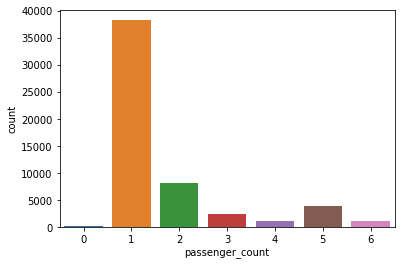

In [ ]:
#Creating a histogram showing how many rows contain a passenger count

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x=df["passenger_count"])

In [ ]:
#filtering for only a single passenger and removing that col and the key col

df = df[df["passenger_count"] == 1]
df = df.drop(["key","passenger_count"],axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065


In [ ]:
df.shape

(38233, 6)

In [ ]:
#Using pandas corr method to find out how much influence input variables have on the fare

corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending = False)

fare_amount          1.000000
dropoff_longitude    0.020438
pickup_longitude     0.015742
pickup_latitude     -0.015915
dropoff_latitude    -0.021711
Name: fare_amount, dtype: float64

In [ ]:
import datetime
from math import sqrt
 
for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6 # 1 degree == 54.6 miles
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
     
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


In [ ]:
df.drop(columns=["pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],inplace=True)

df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.720497
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493


In [ ]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending = False)

fare_amount    1.000000
distance       0.045873
day_of_week    0.009196
pickup_time   -0.019722
Name: fare_amount, dtype: float64

In [ ]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


In [ ]:
#Filtering for outliers

df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]

corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount    1.000000
distance       0.851913
day_of_week   -0.003570
pickup_time   -0.023085
Name: fare_amount, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = df.drop(["fare_amount"],axis=1)
y = df["fare_amount"]

model = LinearRegression()
cross_val_score(model,x,y,cv=5).mean()

0.7258845061910318

# Trying a RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
cross_val_score(model,x,y,cv=5).mean()

0.706157807448991

# Trying GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
cross_val_score(model,x,y,cv=5).mean()

0.750496262408626

In [ ]:
model.fit(x,y)

GradientBoostingRegressor(random_state=0)

In [ ]:
# using the trained model to make a prediction

model.predict(pd.DataFrame({"day_of_week":[4],"pickup_time":[17],"distance":[2.0]}))

array([11.49105571])

In [ ]:
model.predict(pd.DataFrame({"day_of_week":[5],"pickup_time":[17],"distance":[2.0]}))

array([10.95309995])